In [1]:
##########################################################################
# Created on Sat Nov 14 23:27:45 2021                                    #
# Python for Financial Analysis and Risk Management                      #
# @author: Meng Lipeng (FRM, CFA)                                        #
##########################################################################

### Defination

$$\mathit{\Gamma}=\frac{\partial \mathit{\Delta}}{\partial S}=\frac{\partial^2 \mathit{\Pi}}{\partial S^2}\tag{12-4}$$
where,\
$\mathit{\Delta}$:Option delta\
$\mathit{\Pi}$:Option price\
$S$:Underlying price

# 12.2.1.Gamma of European option

### 1.Mathimatical expression

$$\mathit{\Gamma}=\frac{N'(d_1)}{S_0\sigma\sqrt{T}}\tag{12-5}$$
where,\
$d_1=\frac{ln(S_0/K)+(r+\sigma ^2/2)T}{\sigma \sqrt{T}}$\
$N'(x)=\frac{1}{\sqrt{2\pi}}e^{-x^2/2}$\
After rearrangement,\
$$\mathit{\Gamma}=\frac{N'(d_1)}{S_0\sigma\sqrt{T}}=\frac{1}{S_0\sigma\sqrt{2\pi T}}e^{-{d_1}^2/2}\tag{12-6}$$

### 2.Implementation

In [1]:
def gamma_EurOpt(S,K,sigma,r,T):
    '''Define a function to calculate gamma of European option.
    S:underlying price
    K:strike price
    sigma:volatility of underlying asset return(annualized)
    r:risk free rate(continuous compound)
    T:tenor in year'''

    from numpy import exp,log,pi,sqrt
    
    d1=(log(S/K)+(r+pow(sigma,2)/2)*T)/(sigma*sqrt(T))
    gamma=exp(-pow(d1,2)/2)/(S*sigma*sqrt(2*pi*T))
    return gamma

In [2]:
S_ABC=3.27
K_ABC=3.6
sigma_ABC=0.19
shibor_6M=0.02377
T_ABC=0.5

gamma_Eur=gamma_EurOpt(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC)
print('Gamma of European call option of ABC is',round(gamma_Eur,4))

Gamma of European call option of ABC is 0.7763


### 3.Approximate calculation using Delta and Gamma

$$\Delta\mathit{\Pi}\approx \mathit{\Delta}\times(\Delta S)+\frac{1}{2}\times\mathit{\Gamma}\times\Delta S^2\tag{12-7}$$

$$\tilde{ \mathit{\Pi} }\approx \mathit{\Pi}+\mathit{\Delta}\times(\tilde{ S }-S)+\frac{1}{2}\times \Gamma\times(\tilde{S}-S)^2\tag{12-8}$$
where,\
$\tilde{ \mathit{\Pi} }$:option price after change\
$\tilde{ S }$:underlying price after change\
$\mathit{\Delta}$:delta of option

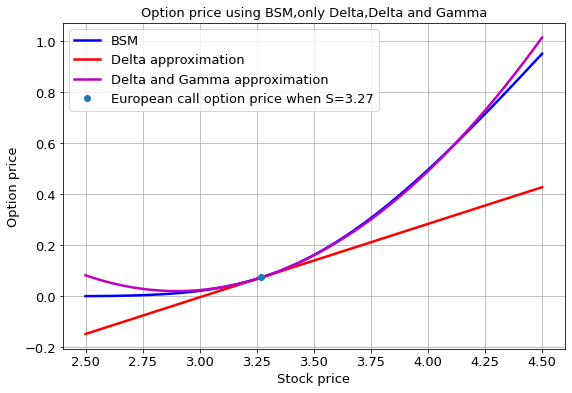

In [4]:
import utils
import matplotlib.pyplot as plt
import numpy as np

delta_EurOpt1=utils.delta_EurOpt(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,optype='call',positype='long')

S_list1=np.linspace(2.5,4.5,200)

value_list=utils.option_BSM(S=S_list1,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,opt='call')
value_one=utils.option_BSM(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,opt='call')

value_approx1=value_one+delta_EurOpt1*(S_list1-S_ABC)
value_approx2=value_one+delta_EurOpt1*(S_list1-S_ABC)+0.5*gamma_Eur*pow(S_list1-S_ABC,2)

plt.figure(figsize=(9,6))
plt.plot(S_list1,value_list,'b-',label='BSM',lw=2.5)
plt.plot(S_list1,value_approx1,'r-',label='Delta approximation',lw=2.5)
plt.plot(S_list1,value_approx2,'m-',label='Delta and Gamma approximation',lw=2.5)
plt.plot(S_ABC,value_one,'o',label='European call option price when S=3.27',lw=2.5)
plt.xlabel('Stock price',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('Option price',fontsize=13)
plt.yticks(fontsize=13)
plt.title('Option price using BSM,only Delta,Delta and Gamma',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

# 12.2.2.Relationship between underlying price,tenor and Gamma

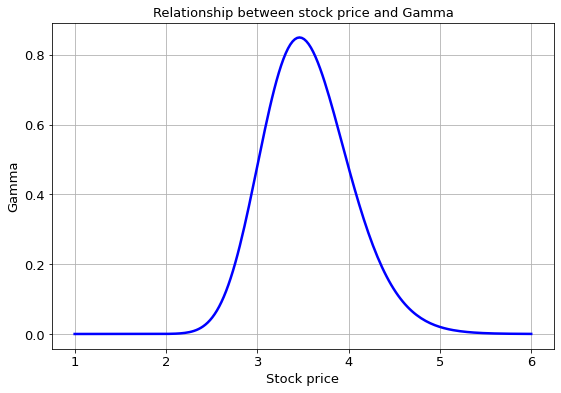

In [6]:
S_list2=np.linspace(1.0,6.0,200)

gamma_list=gamma_EurOpt(S=S_list2,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC)

plt.figure(figsize=(9,6))
plt.plot(S_list2,gamma_list,'b-',lw=2.5)
plt.xlabel('Stock price',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('Gamma',fontsize=13)
plt.yticks(fontsize=13)
plt.title('Relationship between stock price and Gamma',fontsize=13)
plt.grid()
plt.show()

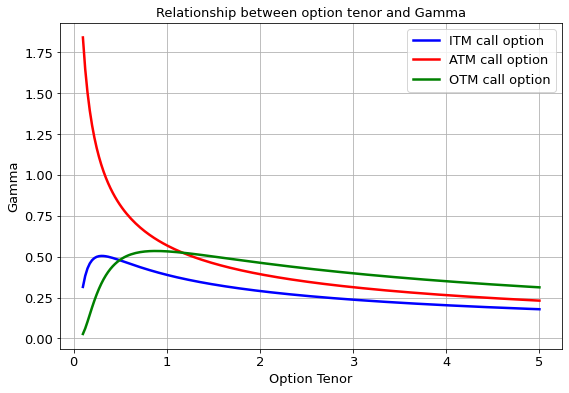

In [7]:
S1=4.0 #In the money call
S2=3.6 #At the money call
S3=3.0 #Out the money call

T_list=np.linspace(0.1,5.0,200)

gamma_list1=gamma_EurOpt(S=S1,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_list)
gamma_list2=gamma_EurOpt(S=S2,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_list)
gamma_list3=gamma_EurOpt(S=S3,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_list)

plt.figure(figsize=(9,6))
plt.plot(T_list,gamma_list1,'b-',label='ITM call option',lw=2.5)
plt.plot(T_list,gamma_list2,'r-',label='ATM call option',lw=2.5)
plt.plot(T_list,gamma_list3,'g-',label='OTM call option',lw=2.5)
plt.xlabel('Option Tenor',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('Gamma',fontsize=13)
plt.yticks(fontsize=13)
plt.title('Relationship between option tenor and Gamma',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

# 12.2.3.Gamma of American option

### Defination

$$\mathit{\Gamma}=\frac{\Delta \mathit{\Delta}}{\Delta S}\tag{12-9}$$

When stock price=$(S_0u^2+S_0)/2$,
$$\mathit{\Delta_1}=\frac{ \mathit{\Pi_{2,2}}-\mathit{\Pi_{2,1}} }{ S_0u^2-S_0 }\tag{12-10}$$

When stock price=$(S_0+S_0d^2)/2$,
$$\mathit{\Delta_2}=\frac{ \mathit{\Pi_{2,1}}-\mathit{\Pi_{2,0}} }{ S_0-S_0d^2 }\tag{12-11}$$

Thus, stock change is $(S_0u^2+S_0)/2-(S_0+S_0d^2)/2=(S_0u^2-S_0d^2)/2$\
Delta change is $\mathit{\Delta_1}-\mathit{\Delta_2}$

Finally,we get the mathimatical expression of Gamma,
$$\mathit{\Gamma}=\frac{\mathit{\Delta_1}-\mathit{\Delta_2}}{\frac{S_0u^2-S_0d^2}{2}}=\frac{2(\mathit{\Delta_1}-\mathit{\Delta_2})}{S_0u^2-S_0d^2}\tag{12-12}$$

### Option value matrix

$$\begin{bmatrix}
\mathit{\Pi} & \mathit{\Pi_{1,1}} & \mathit{\Pi_{2,2}} & \ldots & \mathit{\Pi_{N-1,N-1}} & \mathit{\Pi_{N,N}} \\
0            & \mathit{\Pi_{1,0}} & \mathit{\Pi_{2,1}} & \ldots & \mathit{\Pi_{N-1,N-2}} & \mathit{\Pi_{N,N-1}} \\
0            & 0                  & \mathit{\Pi_{2,0}} & \ldots & \mathit{\Pi_{N-1,N-3}} & \mathit{\Pi_{N,N-2}} \\
\vdots       & \vdots             & \vdots             & \ddots & \vdots                 & \vdots             \\
0            & 0                  & 0                  & \ldots & \mathit{\Pi_{N-1,0}}   & \mathit{\Pi_{N,1}} \\
0            & 0                  & 0                  & \ldots & 0                      & \mathit{\Pi_{N,0}}
\end{bmatrix}$$

In [9]:
def gamma_AmerCall(S,K,sigma,r,T,N):
    '''Define a function to calculate American call option Gamma using N steps binomial tree.
    S:underlying price at t0
    K:strike price
    sigma:volatility of underlying asset return(annualized)
    r:risk free rate(continuous compound)
    T:tenor in year
    N:number of step in the BTM model'''

    import numpy as np
    
    # Step1:Calculate relevant parameters
    t=T/N
    u=np.exp(sigma*np.sqrt(t))
    d=1/u
    p=(np.exp(r*t)-d)/(u-d)
    call_matrix=np.zeros((N+1,N+1))
    
    # Step2:Calculate the underlying asset price and option value at the option maturity node
    N_list=np.arange(0,N+1)
    S_end=S*pow(u,N-N_list)*pow(d,N_list)
    call_matrix[:,-1]=np.maximum(S_end-K,0)
    
    #Step3:Calculate the underlying asset price and option value at the non maturity node of the option
    i_list=list(range(0,N))
    i_list.reverse()
    for i in i_list:
        j_list=np.arange(i+1)
        Si=S*pow(u,i-j_list)*pow(d,j_list)
        call_strike=np.maximum(Si-K,0)
        call_nostrike=(p*call_matrix[:i+1,i+1]+(1-p)*call_matrix[1:i+2,i+1])*np.exp(-r*t)
        call_matrix[:i+1,i]=np.maximum(call_strike,call_nostrike)
    
    Delta1=(call_matrix[0,2]-call_matrix[1,2])/(S*pow(u,2)-S)
    Delta2=(call_matrix[1,2]-call_matrix[2,2])/(S-S*pow(d,2))
    Gamma=2*(Delta1-Delta2)/(S*pow(u,2)-S*pow(d,2))
    
    return Gamma

In [10]:
def gamma_AmerPut(S,K,sigma,r,T,N):
    '''Define a function to calculate American put option Gamma using N steps binomial tree.
    S:underlying price at t0
    K:strike price
    sigma:volatility of underlying asset return(annualized)
    r:risk free rate(continuous compound)
    T:tenor in year
    N:number of step in the BTM model'''

    import numpy as np
    
    # Step1:Calculate relevant parameters
    t=T/N
    u=np.exp(sigma*np.sqrt(t))
    d=1/u
    p=(np.exp(r*t)-d)/(u-d)
    put_matrix=np.zeros((N+1,N+1))
    
    # Step2:Calculate the underlying asset price and option value at the option maturity node
    N_list=np.arange(0,N+1)
    S_end=S*pow(u,N-N_list)*pow(d,N_list)
    put_matrix[:,-1]=np.maximum(K-S_end,0)
    
    #Step3:Calculate the underlying asset price and option value at the non maturity node of the option
    i_list=list(range(0,N))
    i_list.reverse()
    for i in i_list:
        j_list=np.arange(i+1)
        Si=S*pow(u,i-j_list)*pow(d,j_list)
        put_strike=np.maximum(K-Si,0)
        put_nostrike=(p*put_matrix[:i+1,i+1]+(1-p)*put_matrix[1:i+2,i+1])*np.exp(-r*t)
        put_matrix[:i+1,i]=np.maximum(put_strike,put_nostrike)
    
    Delta1=(put_matrix[0,2]-put_matrix[1,2])/(S*pow(u,2)-S)
    Delta2=(put_matrix[1,2]-put_matrix[2,2])/(S-S*pow(d,2))
    Gamma=2*(Delta1-Delta2)/(S*pow(u,2)-S*pow(d,2))
    
    return Gamma

In [12]:
step=100

gamma_AmerOpt1=gamma_AmerCall(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,N=step)
gamma_AmerOpt2=gamma_AmerPut(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,N=step)

print('Gamma of American call option of ABC is ',round(gamma_AmerOpt1,4))
print('Gamma of American put option of ABC is ',round(gamma_AmerOpt2,4))

Gamma of American call option of ABC is  0.7777
Gamma of American put option of ABC is  0.8664
